## Localização antena A B C

### Instalação e carregamento das bibliotecas de GA em python

In [1]:
!pip install deap

     |████████████████████████████████| 160 kB 7.0 MB/s 


In [2]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [3]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
def DespesaAntenas(individual):
  alcanceA = individual[0]
  alcanceB = individual[1]
  alcanceC = individual[2]
  custo_total = (alcanceA+alcanceB+alcanceC)*970
  return custo_total,

In [4]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(individual):
  alcanceA = individual[0]
  alcanceB = individual[1]
  alcanceC = individual[2]
  xA = 22
  yA = 11
  xB = 12
  yB = 33
  xC = 41
  yC = 37
  localizacaoAntenasFisica = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  for localizacaoAntena in localizacaoAntenasFisica:
    if((math.sqrt(((xA-localizacaoAntena[0])**2) + ((yA-localizacaoAntena[1])**2)) <= alcanceA)):
      cidadesAtendidasAntenaA.append(1)
    else:
      cidadesAtendidasAntenaA.append(0)
    if((math.sqrt(((xB-localizacaoAntena[0])**2) + ((yB-localizacaoAntena[1])**2)) <= alcanceB)):
      cidadesAtendidasAntenaB.append(1)
    else:
      cidadesAtendidasAntenaB.append(0)
    if((math.sqrt(((xC-localizacaoAntena[0])**2) + ((yC-localizacaoAntena[1])**2)) <= alcanceC)):
      cidadesAtendidasAntenaC.append(1)
    else:
      cidadesAtendidasAntenaC.append(0)
  for i in range(len(cidadesAtendidasAntenaA)):
    if((cidadesAtendidasAntenaA[i] == 1) or (cidadesAtendidasAntenaB[i] == 1) or (cidadesAtendidasAntenaC[i] == 1)):
      cidadesAtendidas.append(True)
    else:
      cidadesAtendidas.append(False)
  if ((sum(cidadesAtendidasAntenaA)>=3) and (sum(cidadesAtendidasAntenaB)>=3) and (sum(cidadesAtendidasAntenaC)>=3) and (sum(cidadesAtendidas)==10)):
    return True
  return False

In [5]:
# Função para cálculo da penalização da função objetivo para os casos em que o individuo não satisfaça as restrições
def penalidade(individual):
  constraintA = 0
  constraintB = 0
  constraintC = 0
  alcanceA = individual[0]
  alcanceB = individual[1]
  alcanceC = individual[2]
  xA = 22
  yA = 11
  xB = 12
  yB = 33
  xC = 41
  yC = 37
  localizacaoCidades = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  for localizacaoCidade in localizacaoCidades:
    dist = (((xA-localizacaoCidade[0])**2) + ((yA-localizacaoCidade[1])**2) + alcanceA)
    if((math.sqrt(((xA-localizacaoCidade[0])**2) + ((yA-localizacaoCidade[1])**2)) > alcanceA)):
      constraintA = constraintA + dist
    dist = (((xB-localizacaoCidade[0])**2) + ((yB-localizacaoCidade[1])**2) + alcanceB)
    if((math.sqrt(((xB-localizacaoCidade[0])**2) + ((yB-localizacaoCidade[1])**2)) > alcanceB)):
      constraintB = constraintB + dist
    dist = (((xC-localizacaoCidade[0])**2) + ((yC-localizacaoCidade[1])**2) + alcanceC)
    if((math.sqrt(((xC-localizacaoCidade[0])**2) + ((yC-localizacaoCidade[1])**2)) > alcanceC)):
      constraintC = constraintC + dist
  return (constraintA + constraintB + constraintC)*970

In [18]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, attr_bool_function):
  i = 0
  cromossomo = list()
  for _ in range(3): 
    v7 = attr_bool_function()
    v8 = attr_bool_function()
    v9 = attr_bool_function()
    if FuncaoDeRestricao([v7, v8, v9]):
      break
    i = i + 1
  cromossomo.append(v7)
  cromossomo.append(v8)
  cromossomo.append(v9)
  return icls(cromossomo)

In [19]:
# Função própria de cruzamento 
## ~~~~ No caso, não está sendo chamada! ~~~~
def CrossoverFunction(ind1, ind2, icls, attr_bool_function):
  new_ind1, new_ind2 = tools.cxTwoPoint(ind1, ind2)
  if(not(FuncaoDeRestricao(new_ind1))):
    new_ind1,_ = tools.cxOnePoint(ind1, ind2)
    if(not(FuncaoDeRestricao(new_ind1))):
      new_ind1,_ = tools.cxUniform(ind1, ind2, indpb=0.2)
      if(not(FuncaoDeRestricao(new_ind1))):
        tries = 0
        while(not(FuncaoDeRestricao(new_ind1))):
          if tries >= 3:
            new_ind1 = ind1
            break
          new_ind1 = GeradorDeIndividuos(icls, attr_bool_function)
          tries = tries + 1
  if(not(FuncaoDeRestricao(new_ind2))):
    _,new_ind2 = tools.cxOnePoint(ind1, ind2)
    if(not(FuncaoDeRestricao(new_ind2))):
      _,new_ind2 = tools.cxUniform(ind1, ind2, indpb=0.2)
      if(not(FuncaoDeRestricao(new_ind2))):
        tries = 0
        while(not(FuncaoDeRestricao(new_ind2))):
          if tries >= 3:
            new_ind2 = ind2
            break
          new_ind2 = GeradorDeIndividuos(icls, attr_bool_function)
          tries = tries + 1
  return new_ind1,new_ind2

In [20]:
# Função própria de mutação 
## ~~~~ No caso, não está sendo chamada! ~~~~~
def MutationFunction(ind, indpb):
  new_ind = tools.mutFlipBit(ind, indpb)[0]
  alcanceA = new_ind[0]
  alcanceB = new_ind[1]
  alcanceC = new_ind[2]
  tries = 0
  while not(FuncaoDeRestricao([alcanceA, alcanceB, alcanceC])):
    new_ind = tools.mutFlipBit(ind, indpb)[0]
    alcanceA = new_ind[0]
    alcanceB = new_ind[1]
    alcanceC = new_ind[2]
    if tries >= 3:
      new_ind = ind
    tries = tries + 1
  return new_ind,

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [27]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [28]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("attr_bool", random.randint, 0, 50)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
#toolbox.register("individualCreator", GeradorDeIndividuos, toolbox.attr_bool)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.attr_bool)
#toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 2)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", DespesaAntenas)
# Registro da função de penalidade caso o individuo não obedeça as restrições
toolbox.decorate("evaluate", tools.DeltaPenalty(FuncaoDeRestricao, 0, distance=penalidade)) 
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
# toolbox.register("mate", CrossoverFunction, icls, attr_bool_func)
toolbox.register("mate", CrossoverFunction, icls=creator.Individual, attr_bool_function=toolbox.attr_bool)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.35)
# toolbox.register("mutate", MutationFunction, indpb=0.1)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selTournament, tournsize=3)

## Chamada efetiva do GA para resolução

In [35]:
pop = toolbox.population(n=500)                           # inicialização da pop
hof = tools.HallOfFame(10)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [36]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.4, ngen=150, stats=stats, halloffame=hof, verbose=True) #aumentei mut = 0.7

gen	nevals	avg        	std        	min  	max        
0  	500   	2.94061e+06	5.64181e+06	47530	1.88403e+07
1  	367   	4.16316e+06	6.90933e+06	47530	1.86861e+07
2  	374   	4.6536e+06 	7.18204e+06	45590	1.86861e+07
3  	368   	5.07084e+06	7.56676e+06	43650	1.86861e+07
4  	385   	5.40099e+06	7.84642e+06	42680	1.86861e+07
5  	397   	5.90353e+06	8.24869e+06	41710	1.86861e+07
6  	371   	5.23812e+06	8.02413e+06	41710	1.86861e+07
7  	373   	5.42108e+06	8.17945e+06	40740	1.86861e+07
8  	373   	4.8583e+06 	7.92089e+06	40740	1.86861e+07
9  	381   	5.77763e+06	8.40151e+06	40740	1.86958e+07
10 	412   	5.64091e+06	8.3589e+06 	40740	1.86861e+07
11 	385   	5.69556e+06	8.39795e+06	40740	1.86861e+07
12 	384   	6.50837e+06	8.67659e+06	40740	1.86861e+07
13 	383   	5.59031e+06	8.36023e+06	40740	1.86861e+07
14 	384   	5.77968e+06	8.42092e+06	40740	1.86861e+07
15 	373   	5.34172e+06	8.25627e+06	40740	1.86958e+07
16 	374   	5.62978e+06	8.37908e+06	40740	1.86861e+07
17 	373   	5.61373e+06	8.3629e+06 	40740	1.868

## Resultados

In [37]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Verificação da função de restrição
print(FuncaoDeRestricao(hof[0]))


# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
DespesaAntenas(hof[0])

Melhor Indivíduo:
[18, 11, 13]
True
Melhor Resultado da Função Objetivo:


(40740,)

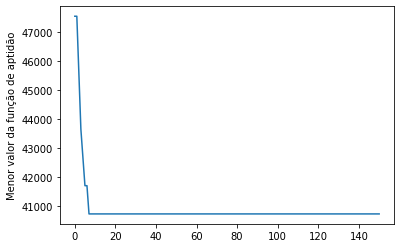

In [38]:
import matplotlib.pyplot as plt
gen, minVal = log.select("gen", "min")
plt.plot(gen, minVal)
plt.ylabel('Menor valor da função de aptidão')
plt.show()

## Utilizando a forma alternativa de resolução do mesmo problema

In [39]:
# definição da população inicial
population = toolbox.population(n=30)
# quantidade de gerações
NGEN=25
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(min(fits))], min(fits)])
  bestInd.append(min(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", min(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(min(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", min(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )


Geracao:  0
[[34, 17, 13], [38, 15, 13], [25, 30, 20], [42, 16, 18], [20, 43, 14], [45, 14, 22], [39, 12, 33], [27, 28, 30], [40, 25, 21], [35, 32, 19], [42, 16, 32], [32, 31, 28], [20, 40, 33], [20, 41, 33], [49, 14, 32], [27, 29, 39], [44, 36, 17], [26, 36, 42], [47, 14, 43], [29, 46, 31], [50, 32, 25], [48, 28, 35], [28, 41, 43], [40, 37, 40], [50, 39, 43], [35, 0, 41], [4, 1, 41], [14, 35, 1], [14, 28, 7], [0, 0, 0]]
[(62080,), (64020,), (72750,), (73720,), (74690,), (78570,), (81480,), (82450,), (83420,), (83420,), (87300,), (88270,), (90210,), (91180,), (92150,), (92150,), (94090,), (100880,), (100880,), (102820,), (103790,), (107670,), (108640,), (113490,), (128040,), (10055990,), (13530530,), (14369580,), (17239810,), (18686080,)]
 Melhor Avaliação dessa geração:  (62080,) 
 Melhor Avaliação Geral (62080,) 
 Da geração:  0 
 Cromossomo:  [34, 17, 13] 

Geracao:  1
[[14, 35, 14], [23, 22, 19], [34, 17, 13], [38, 15, 13], [25, 30, 18], [42, 16, 20], [27, 28, 30], [17, 33, 38], [4

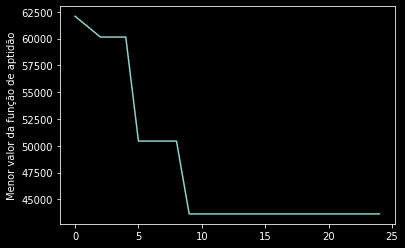

In [40]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Menor valor da função de aptidão')
plt.show()